# Association Analysis
 
## Apriori Algorithm in R

In R, the apriori algorithm is implemented on the <i> arules </i> package.
 
This package comes with some datasets that are suitable to apply association rules analysis. We will use the Groceries dataset. It contains real life grocery transactions. The data is formatted in a special class format called <i> transactions </i>. This format has a complex structure that is manipulated using special functions.
 
To be able to visualize this dataset, we will also use the <i>arulesViz</i> package.

In [2]:
library(arules)
library(arulesViz)

data(Mushroom)

In [4]:
class(Mushroom)

[1] "transactions"
attr(,"package")
[1] "arules"

In [4]:
### Lets see how many transactions the dataset has
length(Mushroom)

[1] 9835

In [6]:
inspect(Mushroom)

In [7]:
inspect(Mushroom[1:5])

    items                    
[1] {Class=poisonous,        
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=brown,         
     Bruises=bruises,        
     Odor=pungent,           
     GillAttached=free,      
     GillSpace=close,        
     GillSize=narrow,        
     GillColor=black,        
     StalkShape=enlarging,   
     StalkRoot=equal,        
     SurfaceAboveRing=smooth,
     SurfaceBelowRing=smooth,
     ColorAboveRing=white,   
     ColorBelowRing=white,   
     VeilType=partial,       
     VeilColor=white,        
     RingNumber=one,         
     RingType=pendant,       
     Spore=black,            
     Habitat=urban}          
[2] {Class=edible,           
     CapShape=convex,        
     CapSurf=smooth,         
     CapColor=yellow,        
     Bruises=bruises,        
     Odor=almond,            
     GillAttached=free,      
     GillSpace=close,        
     GillSize=broad,         
     GillColor=black,        
     Stalk

In [9]:
items <- itemFrequency(Mushroom)
head(items)
summary(items)

Class=edible  Class=poisonous    CapShape=bell CapShape=conical 
    0.5179714426     0.4820285574     0.0556376169     0.0004923683 
   CapShape=flat CapShape=knobbed 
    0.3879862137     0.1019202363

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0004924 0.0132939 0.0723781 0.1925851 0.2850812 1.0000000 

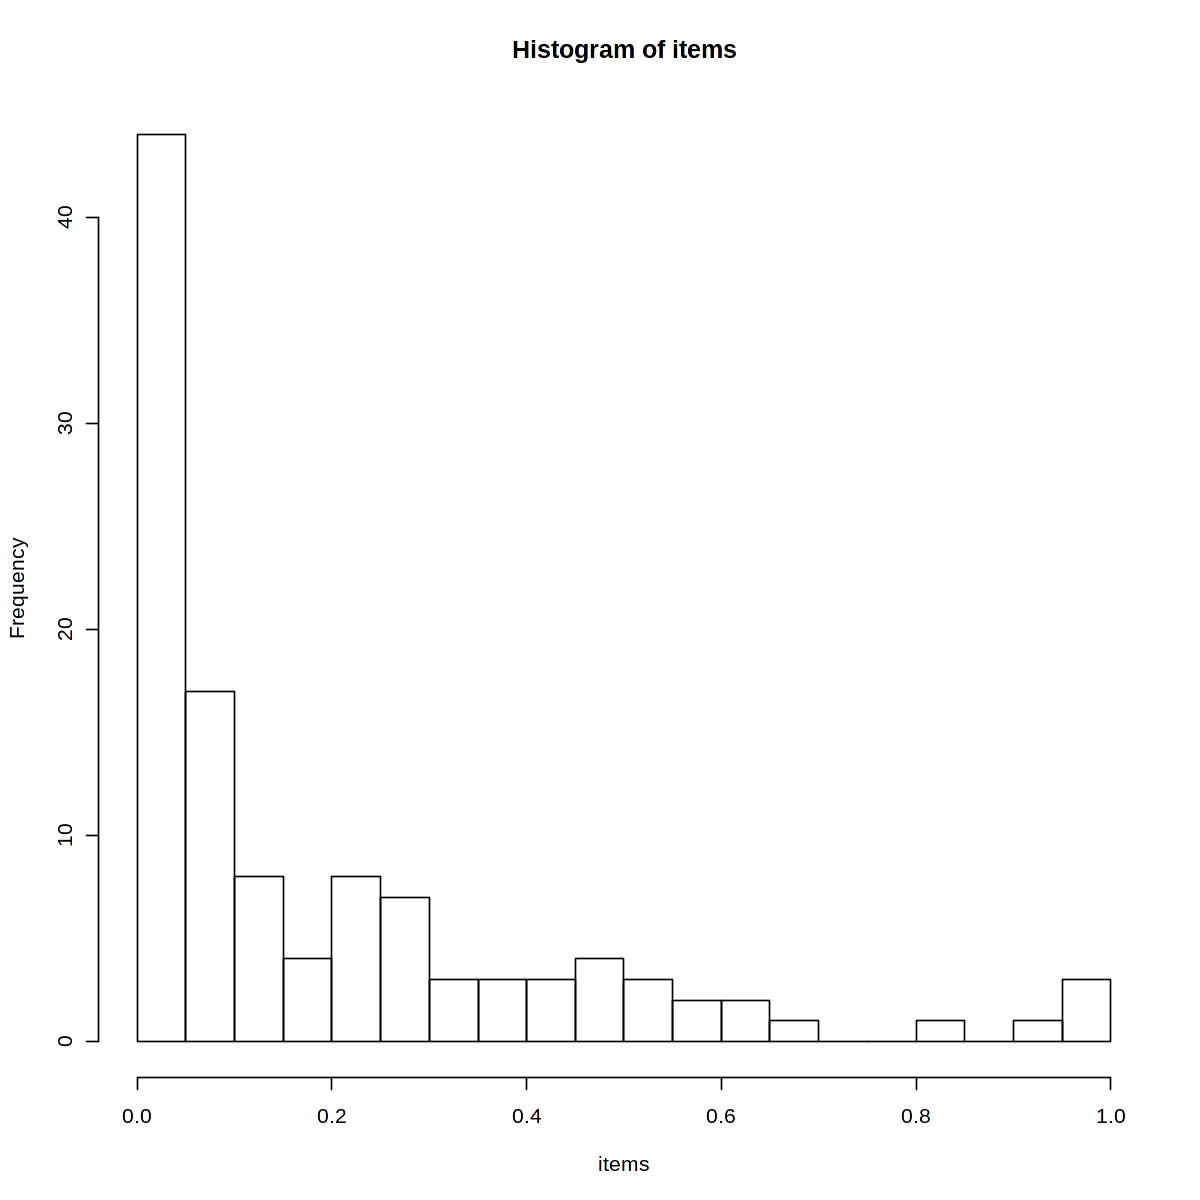

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)
hist(items,breaks = 20)

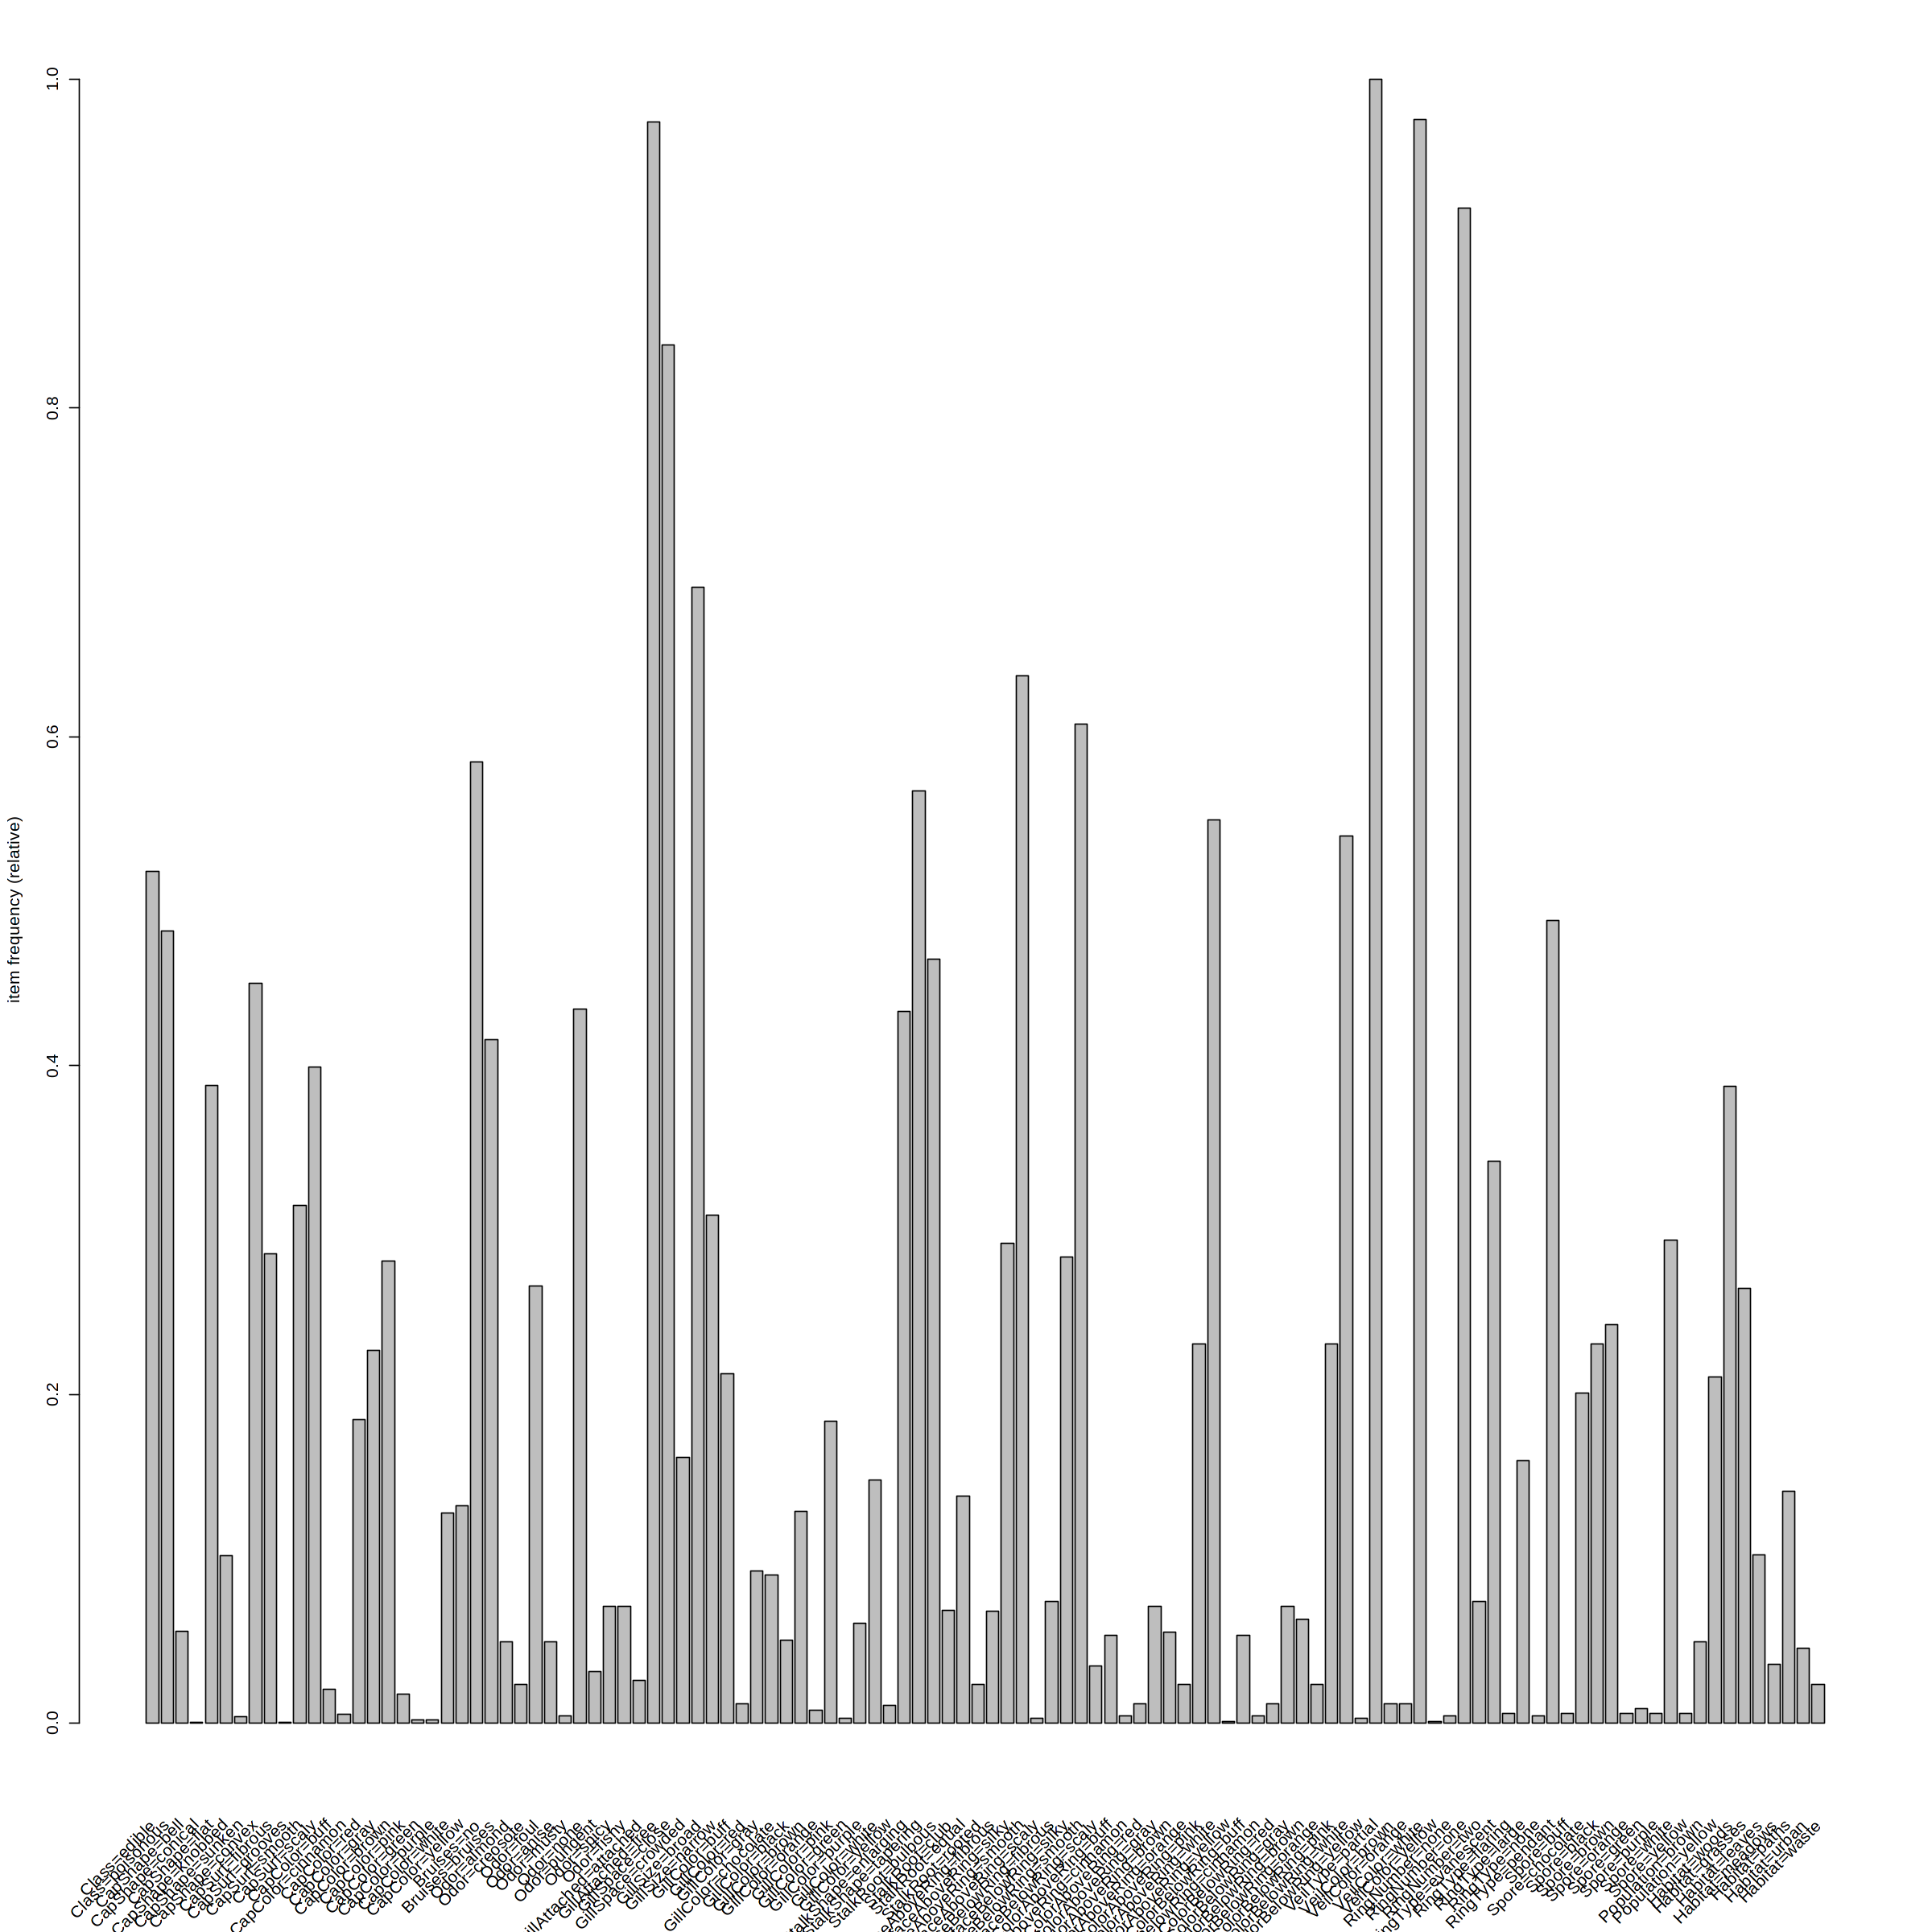

In [20]:
options(repr.plot.width = 20, repr.plot.height = 20)
itemFrequencyPlot(Mushroom)

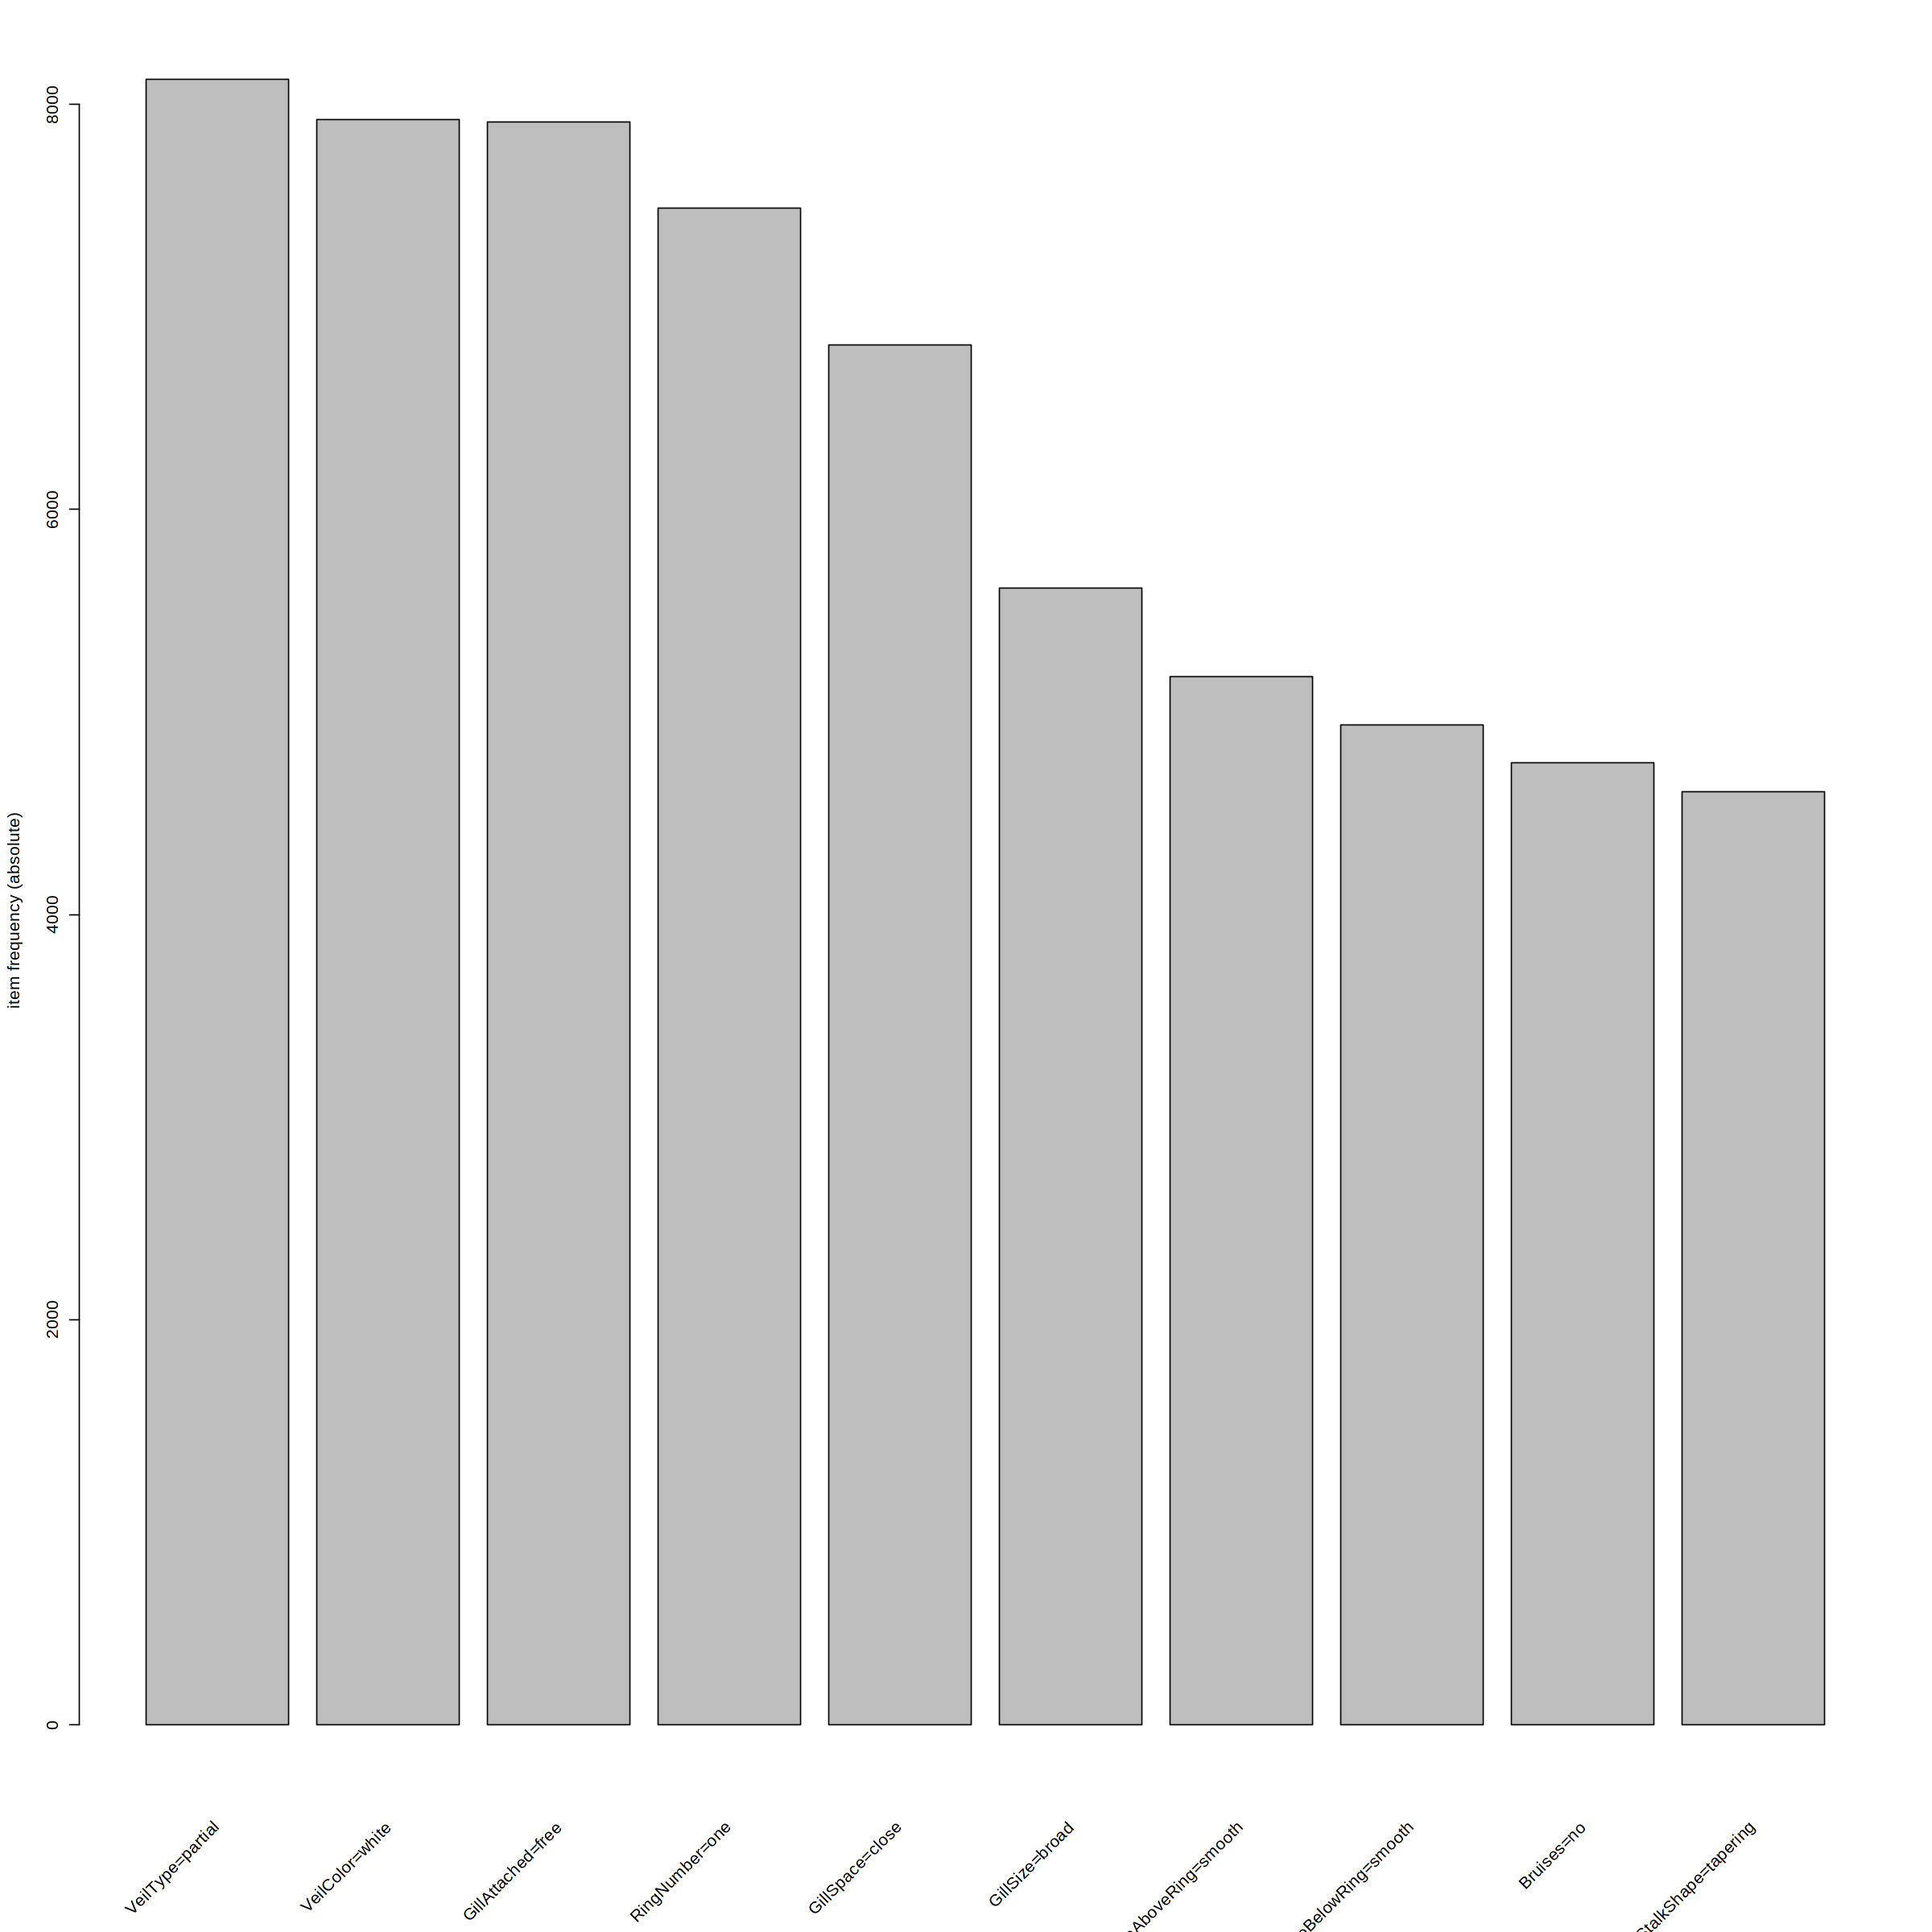

In [21]:
itemFrequencyPlot(Mushroom, topN=10, type="absolute")

In [26]:
### using the apriori algorithm
itemsets <- apriori(data = Mushroom)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 812 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [53 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = Mushroom):
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [3.61s].
writing ... [2142749 rule(s)] done [0.47s].
creating S4 object  ... done [0.68s].


In [37]:
## We can define how to retrieve the list of individual frequent items. For this we set minlen and maxlen to 1.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=1,maxlen=5,support=0.20,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen            target   ext
      5 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1624 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [41 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(data = Mushroom, parameter = list(minlen = 1, maxlen = 5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!”


 done [0.11s].
writing ... [9549 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [57]:
## Lets see the first ten items with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                       support count
[1]  {GillAttached=free,                      
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.8970950  7288
[2]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white}         0.8126539  6602
[3]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[4]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      RingNumber=one}          0.7720335  6272
[5]  {GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[6]  {GillAtt

In [14]:
itemsets

set of 59 itemsets 

In [58]:
## Now we will retrieve the list of frequent paired items. We set minlen and maxlen to 2.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=2,maxlen=2,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen            target   ext
      2 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(data = Mushroom, parameter = list(minlen = 2, maxlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
writing ... [1805 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [59]:
## And check the first ten item pairs with the highest support
inspect(head(sort(itemsets, by="support"),10))


     items                                support   count
[1]  {VeilType=partial,VeilColor=white}   0.9753816 7924 
[2]  {GillAttached=free,VeilType=partial} 0.9741507 7914 
[3]  {GillAttached=free,VeilColor=white}  0.9731659 7906 
[4]  {VeilType=partial,RingNumber=one}    0.9217134 7488 
[5]  {GillAttached=free,RingNumber=one}   0.8980798 7296 
[6]  {VeilColor=white,RingNumber=one}     0.8970950 7288 
[7]  {GillSpace=close,VeilType=partial}   0.8385032 6812 
[8]  {GillSpace=close,VeilColor=white}    0.8148695 6620 
[9]  {GillAttached=free,GillSpace=close}  0.8126539 6602 
[10] {GillSpace=close,RingNumber=one}     0.7956672 6464 


In [44]:
itemsets

set of 1805 itemsets 

In [60]:
## Now we will retrieve the list of frequent triplet items. We set minlen and maxlen to 3.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=3,maxlen=3,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      3
 maxlen            target   ext
      3 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(data = Mushroom, parameter = list(minlen = 3, maxlen = 3, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.05s].
writing ... [17587 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [61]:
## And check the first ten item triplets with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                                                support   count
[1]  {GillAttached=free,VeilType=partial,VeilColor=white} 0.9731659 7906 
[2]  {GillAttached=free,VeilType=partial,RingNumber=one}  0.8980798 7296 
[3]  {GillAttached=free,VeilColor=white,RingNumber=one}   0.8970950 7288 
[4]  {VeilType=partial,VeilColor=white,RingNumber=one}    0.8970950 7288 
[5]  {GillSpace=close,VeilType=partial,VeilColor=white}   0.8148695 6620 
[6]  {GillAttached=free,GillSpace=close,VeilColor=white}  0.8126539 6602 
[7]  {GillAttached=free,GillSpace=close,VeilType=partial} 0.8126539 6602 
[8]  {GillSpace=close,VeilType=partial,RingNumber=one}    0.7956672 6464 
[9]  {GillAttached=free,GillSpace=close,RingNumber=one}   0.7720335 6272 
[10] {GillSpace=close,VeilColor=white,RingNumber=one}     0.7720335 6272 


In [20]:
itemsets

set of 2 itemsets 

In [62]:
## Now we will retrieve the list of frequent four-items. We set minlen and maxlen to 4.
itemsets <- apriori(data = Mushroom, parameter = list(minlen=4,maxlen=4,support=0.02,target="frequent itemsets"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      4
 maxlen            target   ext
      4 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 162 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [84 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4

Warning message in apriori(data = Mushroom, parameter = list(minlen = 4, maxlen = 4, :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”


 done [0.26s].
writing ... [97777 set(s)] done [0.01s].
creating S4 object  ... done [0.02s].


In [63]:
## And check the first ten tetra-item with the highest support
inspect(head(sort(itemsets, by="support"),10))

     items                       support count
[1]  {GillAttached=free,                      
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.8970950  7288
[2]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white}         0.8126539  6602
[3]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[4]  {GillAttached=free,                      
      GillSpace=close,                        
      VeilType=partial,                       
      RingNumber=one}          0.7720335  6272
[5]  {GillSpace=close,                        
      VeilType=partial,                       
      VeilColor=white,                        
      RingNumber=one}          0.7720335  6272
[6]  {GillAtt

In [49]:
itemsets

set of 97777 itemsets 

As we can appreciate, the apriori algorithm, when set with a support threshold of 0.02, found 59 unique items, 61 paired itemsets and 2 triple-items. 
 
Now we will run the apriori algorithm to obtine a low support and high confidence model

In [64]:
rules <- apriori(data = Mushroom, parameter = list(support=0.001, confidence=0.6,target="rules"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [110 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(data = Mushroom, parameter = list(support = 0.001, confidence = 0.6, :
“Mining stopped (time limit reached). Only patterns up to a length of 6 returned!”


 done [5.67s].
writing ... [24813809 rule(s)] done [3.93s].
creating S4 object  ... done [6.66s].


ERROR: Error: cannot allocate vector of size 1.1 Gb


In [52]:
inspect(head(sort(rules, by="lift"),10))

ERROR: Error in sort(rules, by = "lift"): object 'rules' not found


In [53]:
strong_rules <- sort(rules, by="confidence", decreasing = T)
inspect(head(strong_rules,10))

ERROR: Error in sort(rules, by = "confidence", decreasing = T): object 'rules' not found


In [ ]:
strong_rules

As we can see, by setting a very low support (0.001) and a high confidence (0.6) we end up with almost 3000 different rules. 
 
The apriori algorithm will sometimes return dupplicate rules where some of the antecedents are ordered in different ways. As for our rules the order has no importance we have to detect and delete them.

In [28]:
redundant_rules <- is.redundant(strong_rules)
summary(redundant_rules)

   Mode   FALSE    TRUE 
logical    2714     204 

To remove the 204 redundant rules we proceed as follows:

In [29]:
strong_rules <- strong_rules[!redundant_rules]
strong_rules

set of 2714 rules 

In [30]:
strong_rules


set of 2714 rules 

Now, lets say that we are interested to see the items that were purchased with whole milk:

In [68]:
#rules <- apriori(data = Groceries, parameter = list(support=0.001, confidence=0.1),
#                appearance= list(default="rhs",lhs="hamburger meat"))
rules <- apriori(data = Mushroom, parameter = list(support=0.001, confidence=0.10,target="rules"),
                appearance= list(default="rhs",lhs="Class=edible"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [110 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [98 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [69]:
rules

set of 98 rules 

In [70]:
inspect(head(sort(rules, by="lift"),15))

     lhs               rhs                        support    confidence
[1]  {Class=edible} => {ColorBelowRing=gray}      0.07090103 0.1368821 
[2]  {Class=edible} => {ColorAboveRing=gray}      0.07090103 0.1368821 
[3]  {Class=edible} => {Odor=none}                0.41949778 0.8098859 
[4]  {Class=edible} => {StalkRoot=club}           0.06302314 0.1216730 
[5]  {Class=edible} => {GillSpace=crowded}        0.14771049 0.2851711 
[6]  {Class=edible} => {GillColor=purple}         0.05465288 0.1055133 
[7]  {Class=edible} => {GillColor=brown}          0.11521418 0.2224335 
[8]  {Class=edible} => {Spore=brown}              0.21467258 0.4144487 
[9]  {Class=edible} => {Spore=black}              0.20285574 0.3916350 
[10] {Class=edible} => {RingNumber=two}           0.06499261 0.1254753 
[11] {Class=edible} => {Bruises=bruises}          0.33874938 0.6539924 
[12] {Class=edible} => {GillColor=white}          0.11767602 0.2271863 
[13] {Class=edible} => {RingType=pendant}         0.38798621 0.7

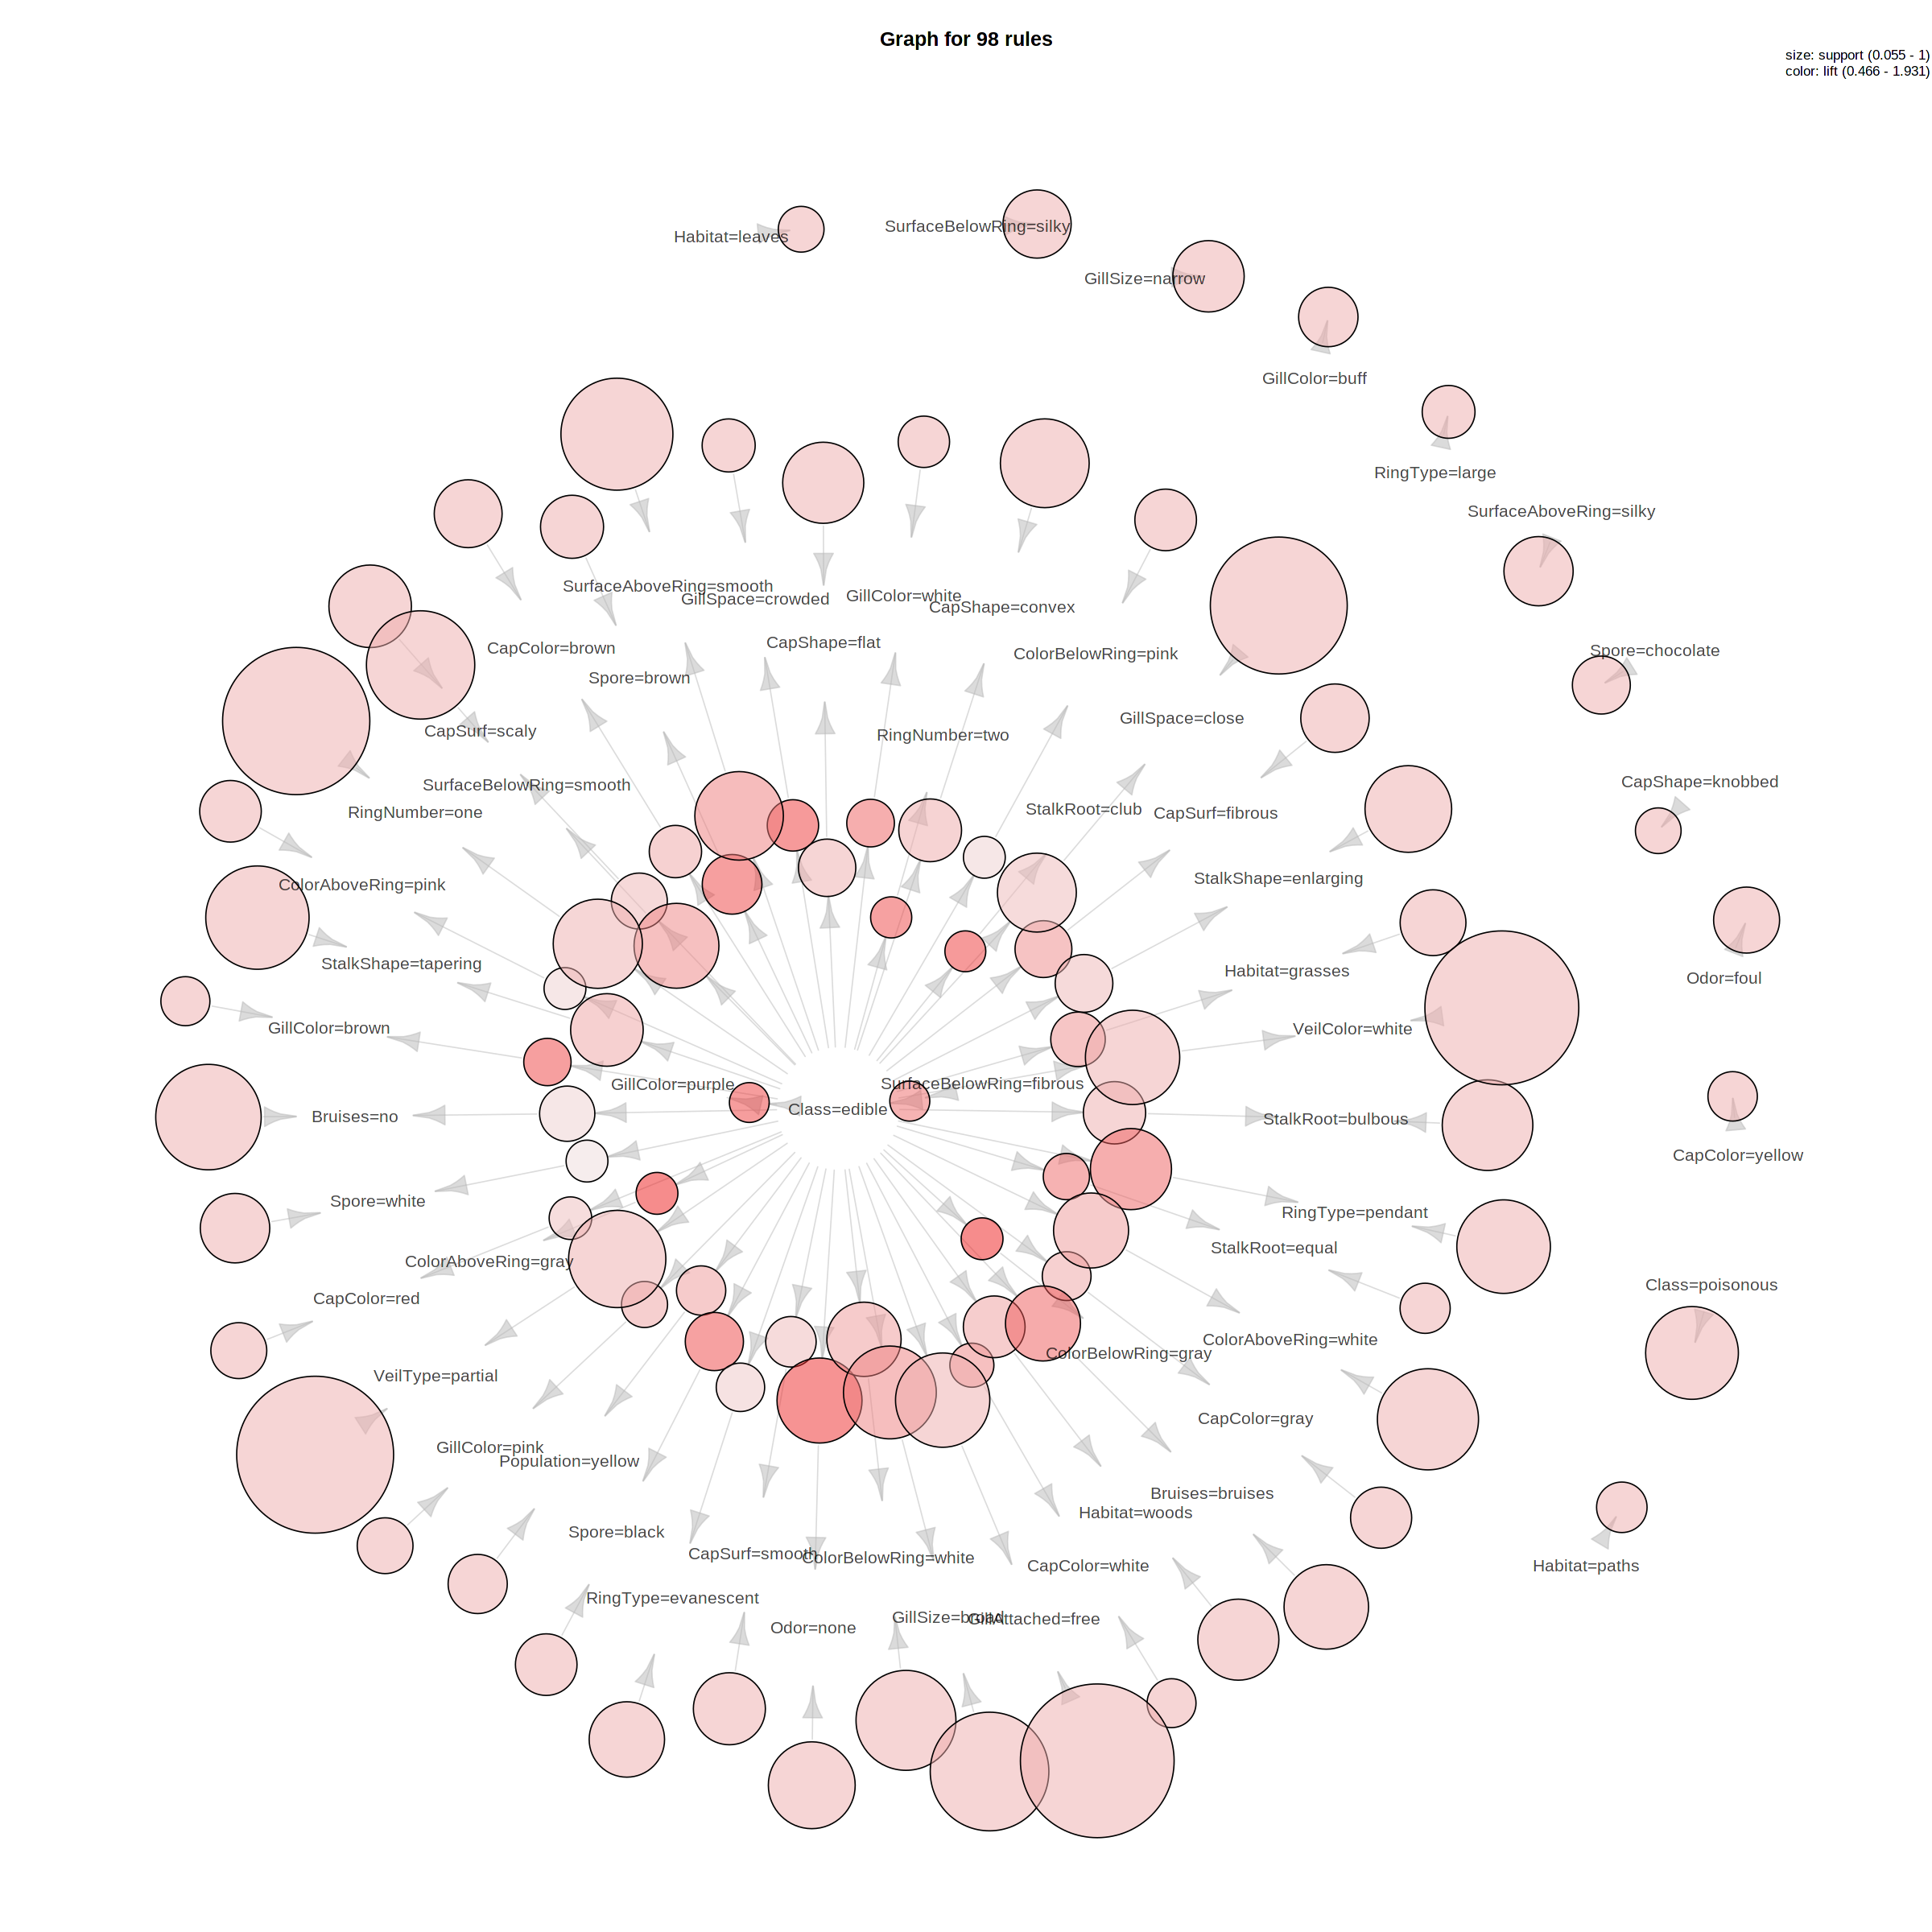

In [71]:
plot(rules, method="graph")

In [72]:
#rules <- apriori(data = Groceries, parameter = list(support=0.001, confidence=0.1),
#                appearance= list(default="rhs",lhs="hamburger meat"))
rules <- apriori(data = Mushroom, parameter = list(support=0.001, confidence=0.10,target="rules"),
                appearance= list(default="rhs",lhs="Class=poisonous"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[114 item(s), 8124 transaction(s)] done [0.01s].
sorting and recoding items ... [110 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [103 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [73]:
inspect(head(sort(rules, by="lift"),15))

     lhs                  rhs                      support    confidence
[1]  {Class=poisonous} => {RingType=large}         0.15952733 0.3309499 
[2]  {Class=poisonous} => {Odor=foul}              0.26587888 0.5515832 
[3]  {Class=poisonous} => {ColorBelowRing=buff}    0.05317578 0.1103166 
[4]  {Class=poisonous} => {ColorAboveRing=buff}    0.05317578 0.1103166 
[5]  {Class=poisonous} => {Odor=fishy}             0.07090103 0.1470889 
[6]  {Class=poisonous} => {Odor=spicy}             0.07090103 0.1470889 
[7]  {Class=poisonous} => {GillColor=buff}         0.21270310 0.4412666 
[8]  {Class=poisonous} => {Spore=chocolate}        0.19497784 0.4044944 
[9]  {Class=poisonous} => {ColorAboveRing=brown}   0.05317578 0.1103166 
[10] {Class=poisonous} => {SurfaceAboveRing=silky} 0.27424914 0.5689479 
[11] {Class=poisonous} => {SurfaceBelowRing=silky} 0.26587888 0.5515832 
[12] {Class=poisonous} => {GillSize=narrow}        0.27375677 0.5679265 
[13] {Class=poisonous} => {Habitat=paths}          

Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”


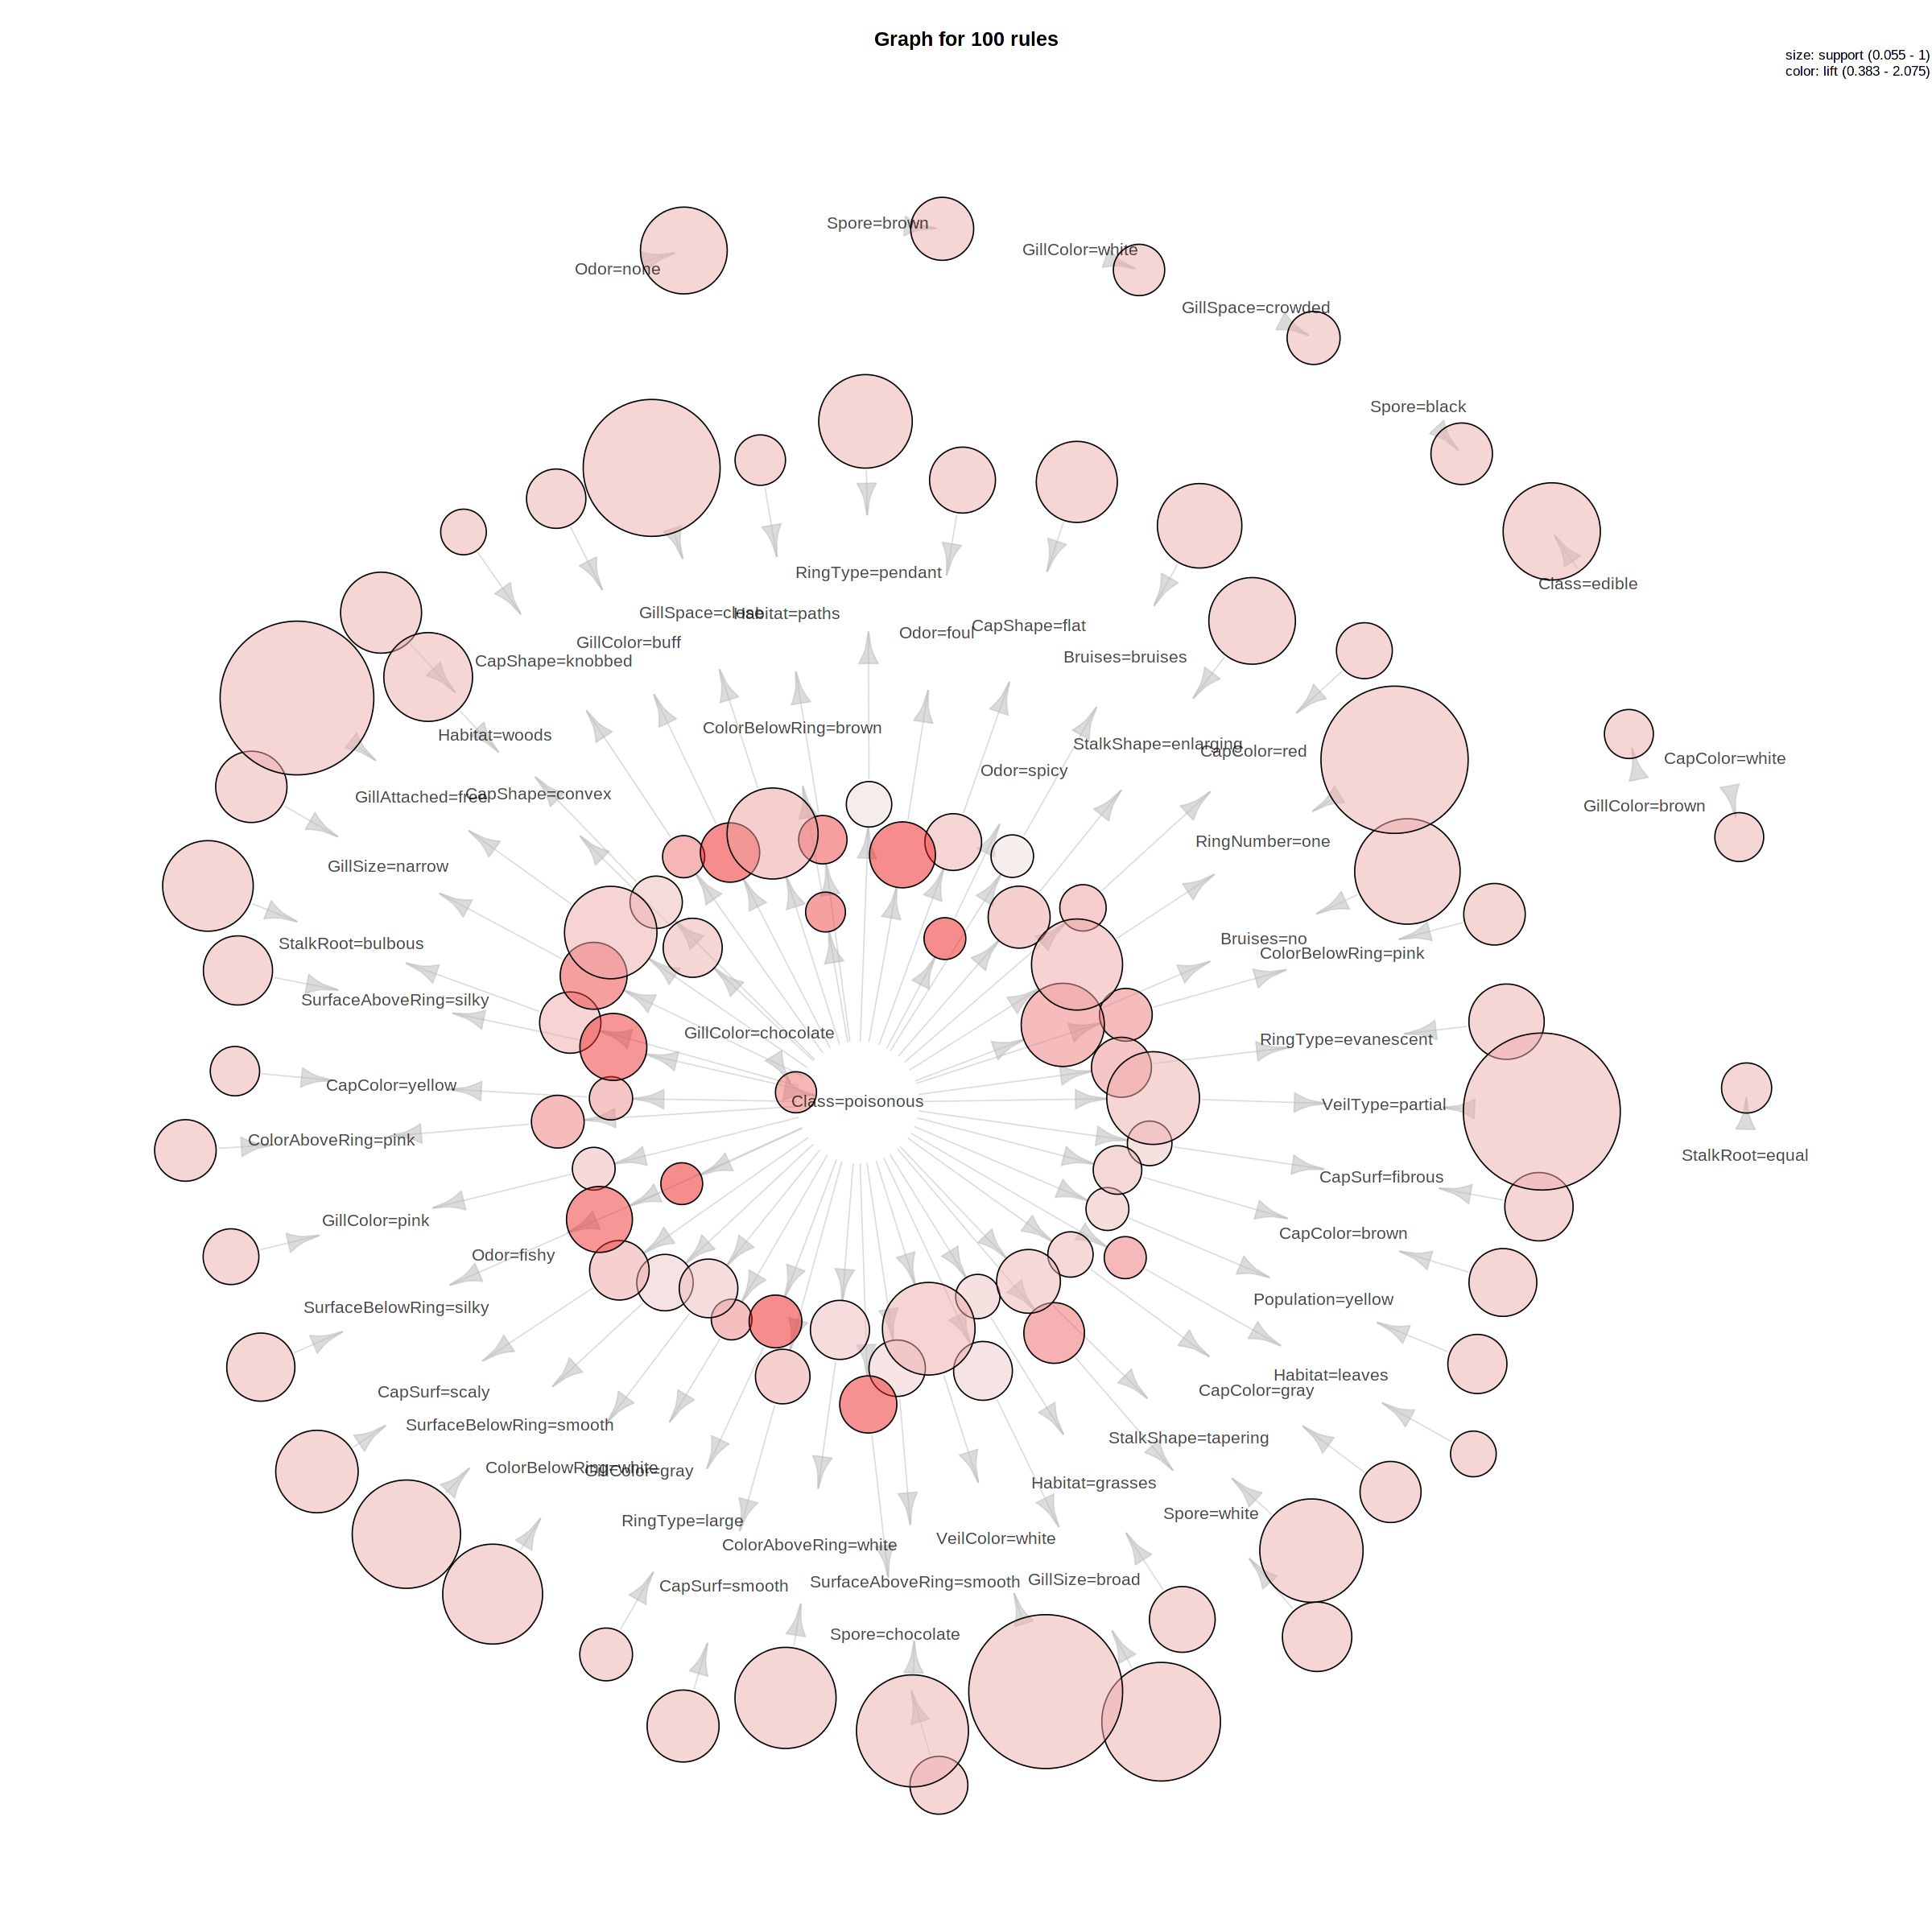

In [74]:
plot(rules, method="graph")